In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # optional but useful
import numpy as np

df_2022 = pd.read_csv("/Users/ryansteele/my_repo2/my_project3/data/matchups/matchups_2022.csv")
df_2023 = pd.read_csv("/Users/ryansteele/my_repo2/my_project3/data/matchups/matchups_2023.csv")
df_2024 = pd.read_csv("/Users/ryansteele/my_repo2/my_project3/data/matchups/matchups_2024.csv")
df_2025 = pd.read_csv("/Users/ryansteele/my_repo2/my_project3/data/matchups/matchups_2025.csv")

df = pd.concat([df_2022, df_2023, df_2024, df_2025], ignore_index=True)

df["target_point_diff"] = df["points_for"] - df["opp_points_for"]
df["win"] = (df["target_point_diff"] > 0).astype(int)

df.head()

,gamekey,date,seasontype,season,week,team,opponent,home_away,points_for,points_against,...,opp_rolling_yards_total_3,opp_rolling_yards_allowed_3,opp_rolling_turnover_diff_3,opp_rolling_third_down_pct_3,opp_rolling_win_rate_5,opp_cumulative_points_for,opp_cumulative_points_against,opp_cumulative_wins,opp_target_next_point_diff,target_point_diff
0,202210132,2022-09-08T20:20:00,1,2022,1,LAR,BUF,HOME,10,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,-21
1,202210113,2022-09-11T13:00:00,1,2022,1,HOU,IND,HOME,20,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-24.0,0
2,202210107,2022-09-11T13:00:00,1,2022,1,CIN,PIT,HOME,20,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.0,-3
3,202210105,2022-09-11T13:00:00,1,2022,1,CAR,CLE,HOME,24,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-2
4,202210135,2022-09-11T13:00:00,1,2022,1,WAS,JAX,HOME,28,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,6


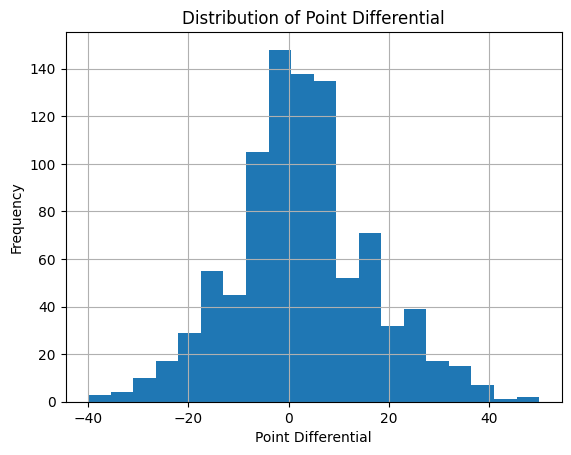

,points_for,points_against,target_point_diff
count,925.000000,925.000000,925.000000
mean,23.443243,21.088649,2.354595
std,9.926912,9.429778,13.764473
min,0.000000,0.000000,-40.000000
25%,17.000000,15.000000,-6.000000
50%,23.000000,20.000000,2.000000
75%,30.000000,27.000000,10.000000
max,70.000000,51.000000,50.000000


In [79]:
df["target_point_diff"].hist(bins=20)
plt.title("Distribution of Point Differential")
plt.xlabel("Point Differential")
plt.ylabel("Frequency")
plt.show()

df[["points_for", "points_against", "target_point_diff"]].describe()

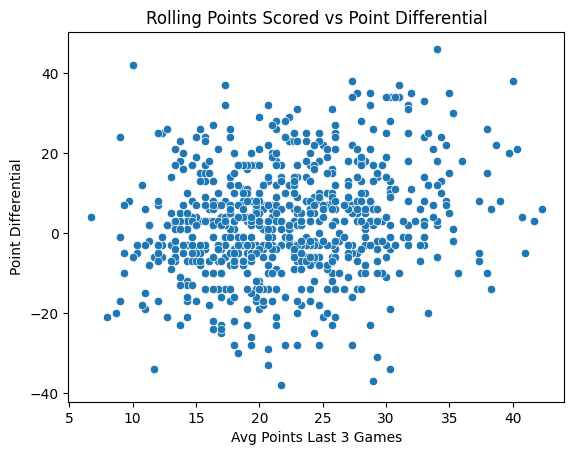

In [81]:
sns.scatterplot(data=df, x="rolling_points_for_3", y="target_point_diff")
plt.title("Rolling Points Scored vs Point Differential")
plt.xlabel("Avg Points Last 3 Games")
plt.ylabel("Point Differential")
plt.show()

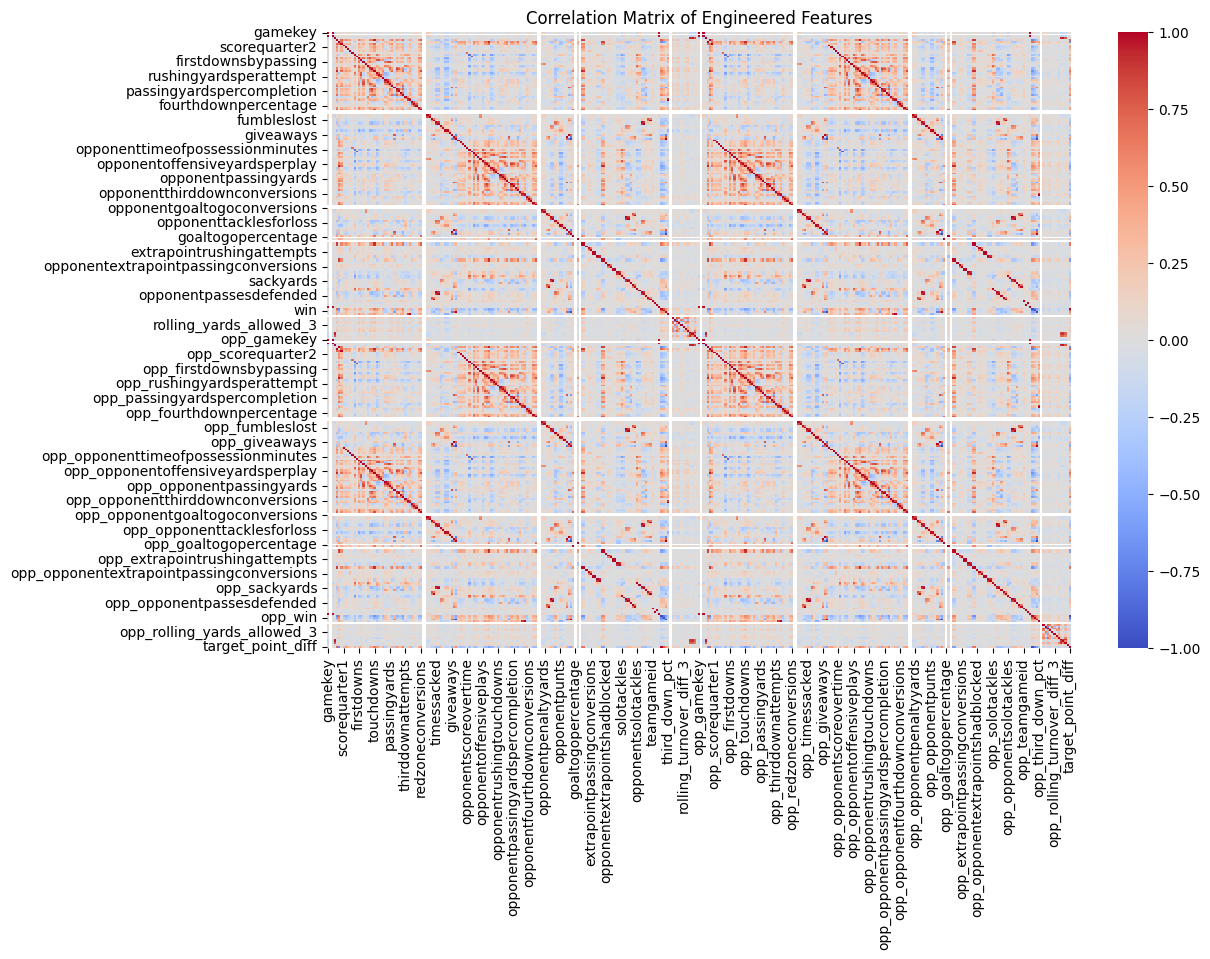

In [83]:
corr = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Engineered Features")
plt.show()

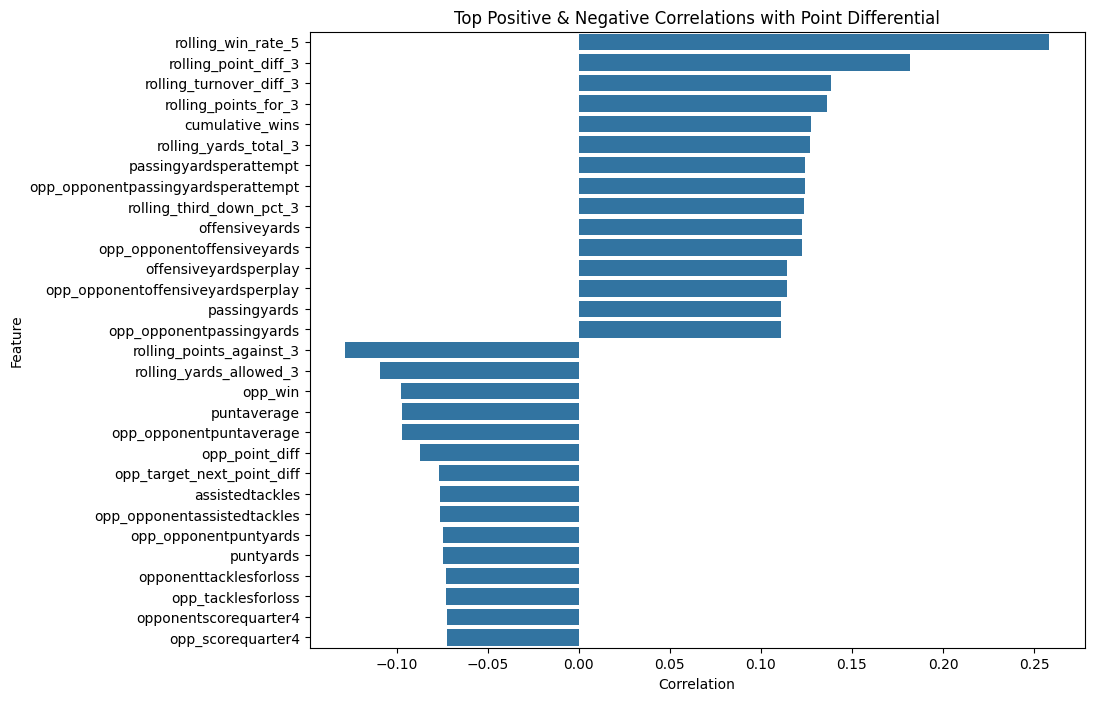

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr = (
    df.select_dtypes(include=['float64', 'int64']).corr()['target_next_point_diff'].drop(labels=['target_next_point_diff'], errors='ignore').dropna()
)

top_corr = corr.sort_values(ascending=False).head(15)
bottom_corr = corr.sort_values(ascending=True).head(15)

important_corr = pd.concat([top_corr, bottom_corr])

plt.figure(figsize=(10, 8))
sns.barplot(x=important_corr.values, y=important_corr.index)
plt.title("Top Positive & Negative Correlations with Point Differential")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.show()

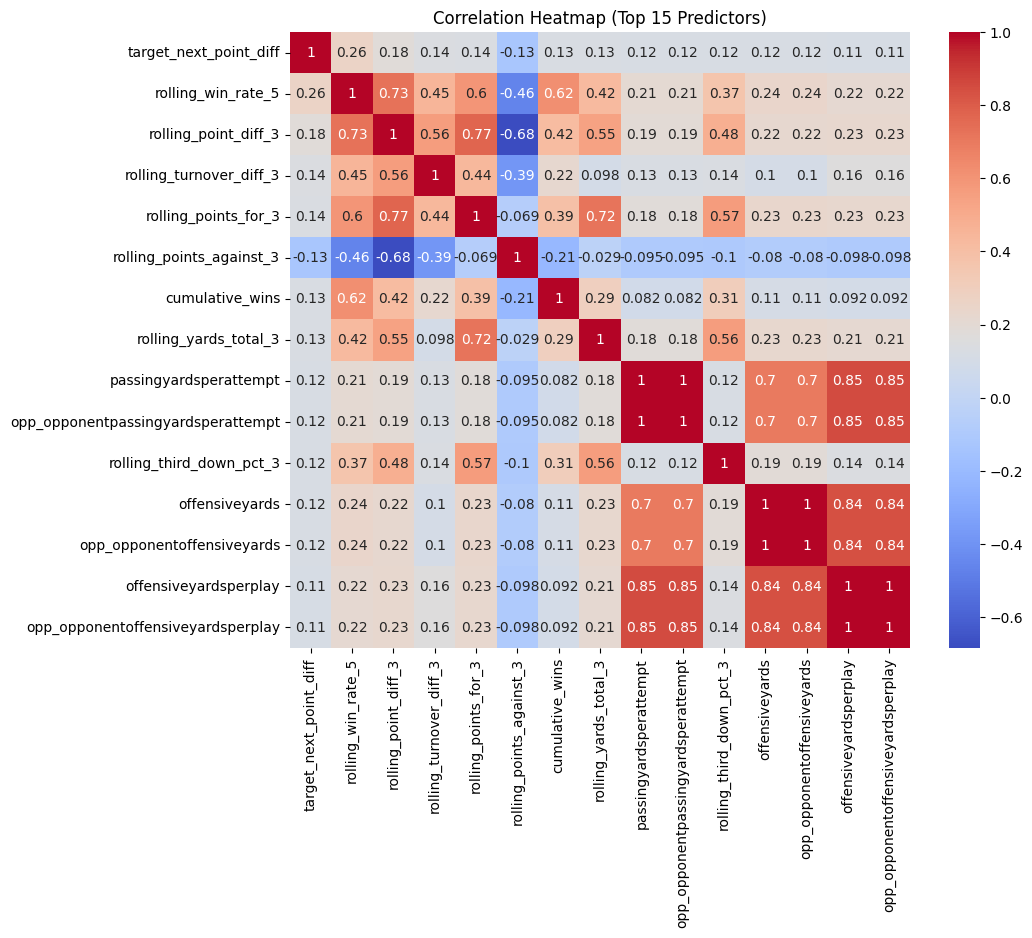

In [75]:
corr = df.select_dtypes(include=['float64', 'int64']).corr()['target_next_point_diff'].dropna()
top_features = corr.abs().sort_values(ascending=False).head(15).index
plt.figure(figsize=(10,8))
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Top 15 Predictors)")
plt.show()

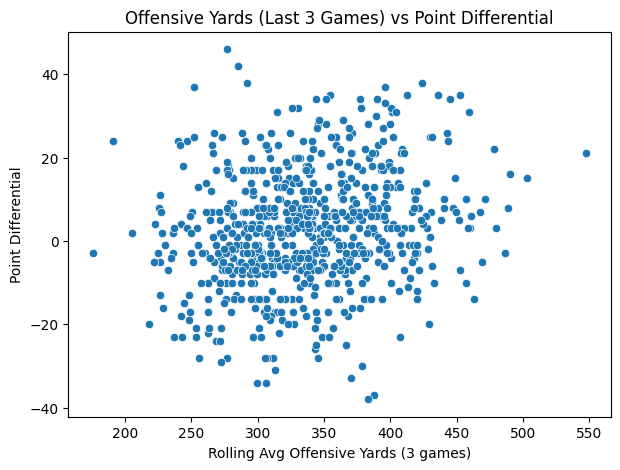

In [87]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='rolling_yards_total_3', y='target_point_diff', data=df)
plt.title("Offensive Yards (Last 3 Games) vs Point Differential")
plt.xlabel("Rolling Avg Offensive Yards (3 games)")
plt.ylabel("Point Differential")
plt.show()